In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
# import pmdarima as pm

In [3]:
#conda update conda

In [4]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.21.5
Pandas version: 1.4.2
Seaborn version: 0.11.2
Matplotlib version: 3.5.1
Sklearn version: 1.0.2
Statsmodels version: 0.13.2


## Read the data from the '.xlsx' file as a monthly Time Series.

In [5]:
df=pd.read_excel(r'C:\Users\Shilpi\OneDrive\Desktop\PROJECTS\TIME SERIES\CCI.xlsx')
df.head()

,TIME,CONSUMER CONF INDEX
0,2014-01-01,99.33512
1,2014-02-01,99.40863
2,2014-03-01,99.44245
3,2014-04-01,99.51904
4,2014-05-01,99.50475


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TIME                 105 non-null    datetime64[ns]
 1   CONSUMER CONF INDEX  105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [7]:
df['TIME'].unique()

array(['2014-01-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2014-06-01T00:00:00.000000000',
       '2014-07-01T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01

In [8]:
df['TIME'].min()

Timestamp('2014-01-01 00:00:00')

In [9]:
df['TIME'].max()

Timestamp('2022-09-01 00:00:00')

In [10]:
df.set_index(keys='TIME',inplace=True)
df

,CONSUMER CONF INDEX
TIME,
2014-01-01,99.33512
2014-02-01,99.40863
2014-03-01,99.44245
2014-04-01,99.51904
2014-05-01,99.50475
...,...
2022-05-01,96.41887
2022-06-01,95.99519
2022-07-01,95.97128


## Plot the Time Series to understand the behaviour of the data.

In [11]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

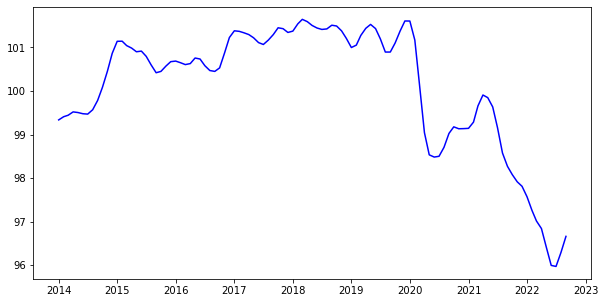

In [12]:
plt.rcParams['figure.figsize']=(10,5)
# fill the missing data based on the corresponding value in the previous row.
df['CONSUMER CONF INDEX']= df['CONSUMER CONF INDEX'].fillna(method ='ffill')
# pass the data and declared the colour of your curve, i.e., blue
plt.plot(df['CONSUMER CONF INDEX'], color='blue')
plt.show()


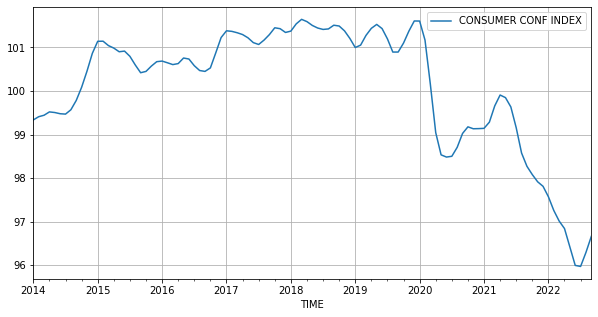

In [13]:
df.plot(grid=True);

We can see that there is a downward trend with some seasonal pattern associated as well. For seasonal pattern, We need to specifically look at the decomposition of the dataset. 

## Check the basic measures of descriptive statistics

In [14]:
df.describe()

,CONSUMER CONF INDEX
count,105.000000
mean,100.118321
std,1.453839
min,95.971280
25%,99.335120
50%,100.646700
75%,101.226000
max,101.643600


The basic measures of descriptive statistics tell us how the CCI varies across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.
We observe that there is not much outliers present in the dataset as mean and median converge. Also, The min value in the column does not have very much difference from max value.

Hence, Considering outlier removal will not make sense. (for yashika)

## Plot a boxplot to understand the spread of accidents across different years and within different months across years.

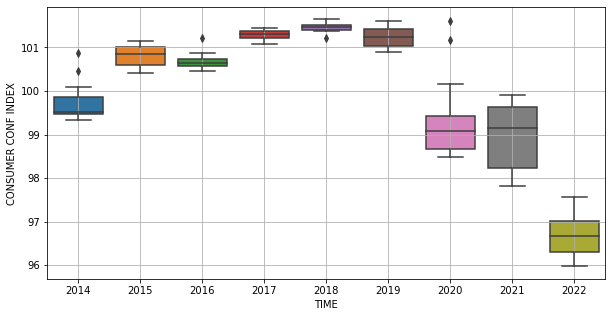

In [15]:
#yearly plot
sns.boxplot(x = df.index.year,y = df['CONSUMER CONF INDEX'])
plt.grid();

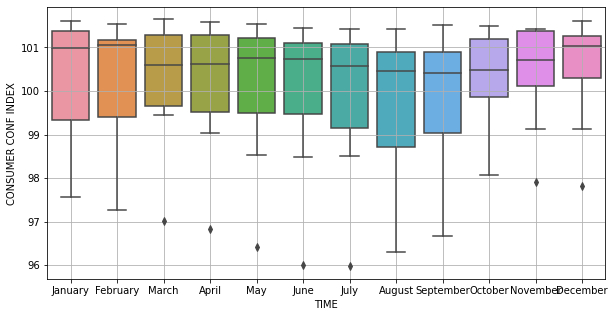

In [16]:
#monthly plot
sns.boxplot(x = df.index.month_name(),y = df['CONSUMER CONF INDEX'])
plt.grid();

## Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

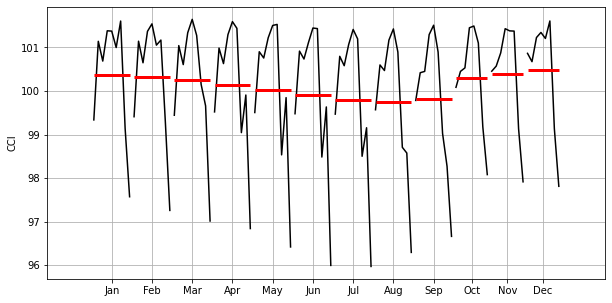

In [17]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['CONSUMER CONF INDEX'],ylabel='CCI')
plt.grid();

## Plot a graph of monthly CONSUMER CONF INDEX across years.

In [18]:
monthly_cci_across_years = pd.pivot_table(df, values = 'CONSUMER CONF INDEX', columns = df.index.month, index = df.index.year)
monthly_cci_across_years

TIME,1,2,3,4,5,6,7,8,9,10,11,12
TIME,,,,,,,,,,,,
2014,99.33512,99.40863,99.44245,99.51904,99.50475,99.47705,99.46846,99.56802,99.78236,100.08370,100.45350,100.86340
2015,101.13970,101.14210,101.04120,100.98390,100.89990,100.91470,100.79480,100.59670,100.41830,100.44880,100.57060,100.67210
2016,100.68570,100.64670,100.60510,100.62810,100.75600,100.73300,100.57970,100.46890,100.44890,100.52930,100.87340,101.22600
2017,101.38090,101.36800,101.33610,101.29470,101.22030,101.10970,101.06690,101.16760,101.29390,101.45020,101.42930,101.34300
2018,101.37360,101.54020,101.64360,101.59160,101.50380,101.44450,101.41230,101.42380,101.50900,101.49080,101.37920,101.20520
2019,100.99680,101.05210,101.27460,101.43760,101.52730,101.43160,101.19510,100.89300,100.89300,101.09990,101.37400,101.60630
2020,101.60470,101.16810,100.15020,99.04313,98.53316,98.48238,98.50002,98.70583,99.02446,99.17614,99.13219,99.13531
2021,99.14153,99.28388,99.65746,99.90664,99.84676,99.63269,99.15526,98.57474,98.26997,98.07962,97.91412,97.81084
2022,97.57133,97.25768,97.01434,96.84113,96.41887,95.99519,95.97128,96.29353,96.66169,NaN,NaN,NaN


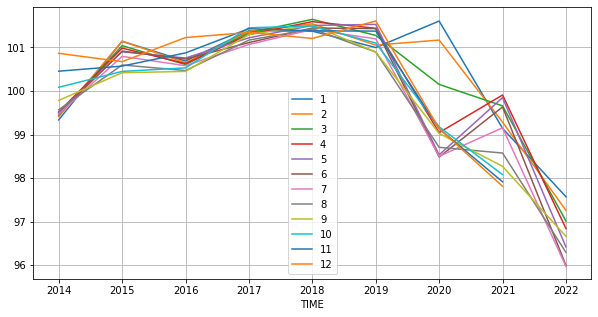

In [19]:
monthly_cci_across_years.plot()
plt.grid()
plt.legend(loc='best');

## Decompose the Time Series and plot the different components.

In [20]:
from    statsmodels.tsa.seasonal import  seasonal_decompose

### Additive Decomposition

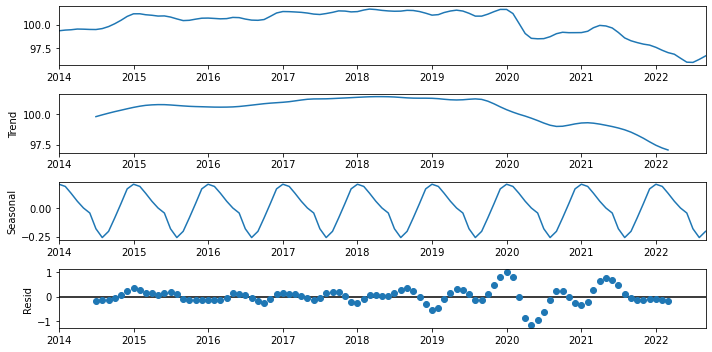

In [21]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

We see that the residuals have a pattern in this decomposition.
Decomposition through additive model is not of much use for us as residuals are itself having pattern in it. Hence, somewhere the line graph is majorly infleunced by residuals.

In [22]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 TIME
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01     99.817397
2014-08-01     99.964816
2014-09-01    100.103659
2014-10-01    100.231309
2014-11-01    100.350476
2014-12-01    100.468510
Name: trend, dtype: float64 

Seasonality 
 TIME
2014-01-01    0.204931
2014-02-01    0.185763
2014-03-01    0.127051
2014-04-01    0.057086
2014-05-01   -0.001362
2014-06-01   -0.045027
2014-07-01   -0.181692
2014-08-01   -0.258046
2014-09-01   -0.204035
2014-10-01   -0.087620
2014-11-01    0.038381
2014-12-01    0.164568
Name: seasonal, dtype: float64 

Residual 
 TIME
2014-01-01         NaN
2014-02-01         NaN
2014-03-01         NaN
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01   -0.167246
2014-08-01   -0.138750
2014-09-01   -0.117264
2014-10-01   -0.059990
2014-11-01    0.064642
2014-12-01    0.230322
Name: resid, dtype: float64 



### Multiplicative Decomposition

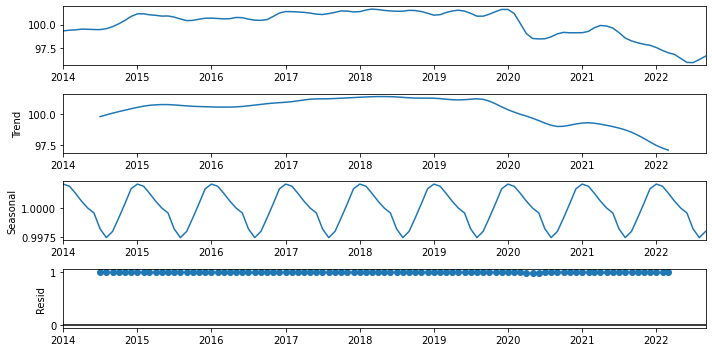

In [23]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [24]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 TIME
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01     99.817397
2014-08-01     99.964816
2014-09-01    100.103659
2014-10-01    100.231309
2014-11-01    100.350476
2014-12-01    100.468510
Name: trend, dtype: float64 

Seasonality 
 TIME
2014-01-01    1.002046
2014-02-01    1.001853
2014-03-01    1.001266
2014-04-01    1.000570
2014-05-01    0.999986
2014-06-01    0.999552
2014-07-01    0.998188
2014-08-01    0.997428
2014-09-01    0.997968
2014-10-01    0.999126
2014-11-01    1.000378
2014-12-01    1.001640
Name: seasonal, dtype: float64 

Residual 
 TIME
2014-01-01         NaN
2014-02-01         NaN
2014-03-01         NaN
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01    0.998313
2014-08-01    0.998599
2014-09-01    0.998820
2014-10-01    0.999401
2014-11-01    1.000649
2014-12-01    1.002287
Name: resid, dtype: float64 



For the multiplicative series, we see that a lot of residuals are located around 1. Hence, We see here multiplicative decomposition works best as it has streamlined the residuals. 
For trend, Till end of 2019- we do not observe any significant pattern. Though afterwards we observe a downward pattern. 

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test  determines whether the series is non-stationary or not

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series is non-stationary.
* $H_1$ : The Time Series is thus stationary.



In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])
print ('Number of Observations Used', dftest[3])

DF test statistic is -1.516
DF test p-value is 0.8234214055434306
Number of lags used 5
Number of Observations Used 99


We see that at 5% significant level the Time Series is non-stationary.

#### Differencing

Let us take one level of differencing to see whether the series becomes stationary.

In [27]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.763
DF test p-value is 0.0005444447145880853
Number of lags used 9


Here, We see that at 5% significant level the Time Series is stationary.

Now, let us go ahead and plot the stationary series.

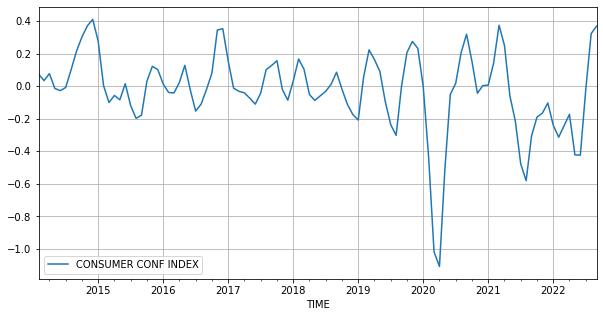

In [28]:
df.diff().dropna().plot(grid=True);

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

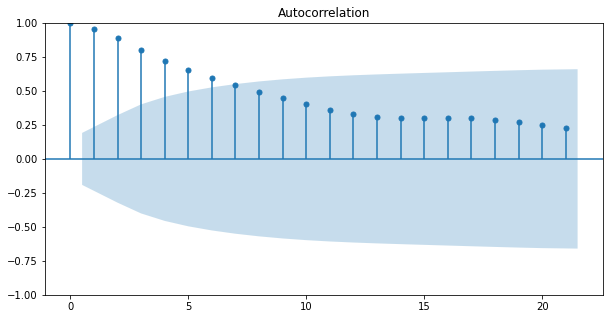

In [30]:
plot_acf(df,alpha=0.05);

C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


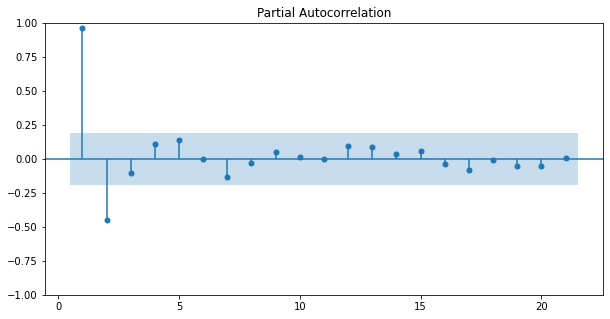

In [31]:
plot_pacf(df,zero=False,alpha=0.05);

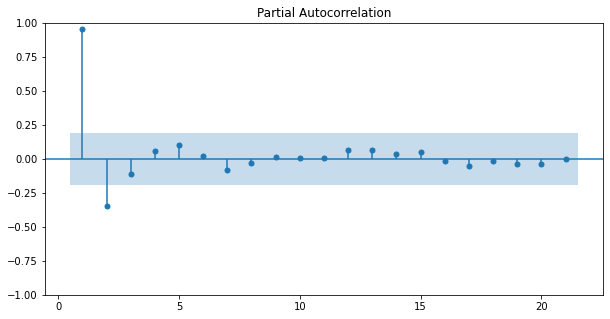

In [32]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 2019. Test Data is from the beginning of 2020 to the last time stamp provided.

In [33]:
df.index.year.unique()

Int64Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int64', name='TIME')

In [34]:
train = df[df.index<='2019'] 
test = df[df.index>'2019']

In [35]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [36]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,CONSUMER CONF INDEX
TIME,
2014-01-01,99.33512
2014-02-01,99.40863
2014-03-01,99.44245
2014-04-01,99.51904
2014-05-01,99.50475


Last few rows of Training Data


,CONSUMER CONF INDEX
TIME,
2018-09-01,101.5090
2018-10-01,101.4908
2018-11-01,101.3792
2018-12-01,101.2052
2019-01-01,100.9968


First few rows of Test Data


,CONSUMER CONF INDEX
TIME,
2019-02-01,101.0521
2019-03-01,101.2746
2019-04-01,101.4376
2019-05-01,101.5273
2019-06-01,101.4316


Last few rows of Test Data


,CONSUMER CONF INDEX
TIME,
2022-05-01,96.41887
2022-06-01,95.99519
2022-07-01,95.97128
2022-08-01,96.29353
2022-09-01,96.66169


In [37]:
print(train.shape)
print(test.shape)

(61, 1)
(44, 1)


## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

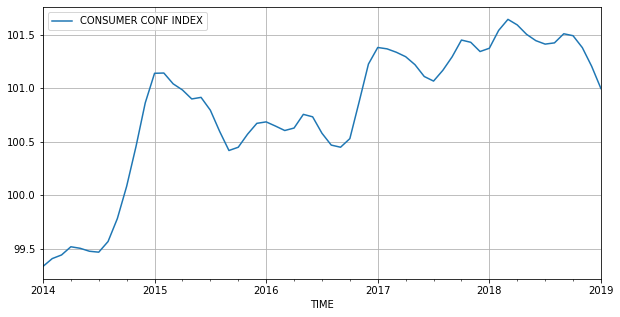

In [38]:
train.plot(grid=True);

In [39]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.186
DF test p-value is 0.49748645940892305
Number of lags used 3


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [40]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

#Regression can be interpreted as convergrence at an optimal point
#unit root Constant & trend-->
#y^t = by'(t-1) + e
#10 = 2*4 +2
#y^t = ayt-1 + a2y(t-2) + a3y(t-3) + e
#p value --> AR (so that remove the partial auto correlation between any 2 values of time period )
#q Value --> MA (Auto correlation)
#stationarity = constant variance (delta value)

DF test statistic is -5.483
DF test p-value is 2.490450587634272e-05
Number of lags used 1


The training data is stationary at 95% confidence level. 


Now, let us go ahead and plot the differenced training data.

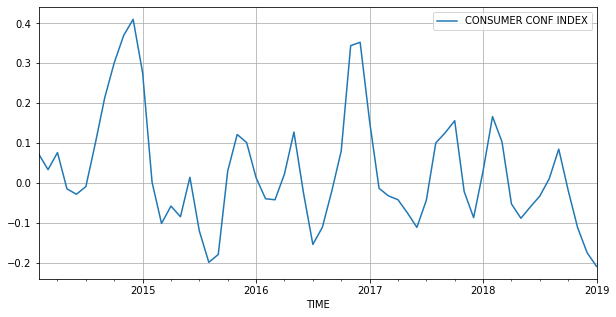

In [41]:
train.diff().dropna().plot(grid=True);

#### If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models.

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2014-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CONSUMER CONF INDEX  61 non-null     float64
dtypes: float64(1)
memory usage: 976.0 bytes


## Model 1

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

#### The data has some seasonality so ideally we should build a SARIMA model. But here we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [43]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [44]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [45]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['CONSUMER CONF INDEX'].values,order=param).fit() #fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic)) #printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:-60.828510236391054


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

ARIMA(0, 1, 1) - AIC:-106.74408459737529
ARIMA(0, 1, 2) - AIC:-128.61582968920166
ARIMA(0, 1, 3) - AIC:-126.77149977863698


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 0) - AIC:-105.77462506668789
ARIMA(1, 1, 1) - AIC:-122.66945797554635
ARIMA(1, 1, 2) - AIC:-127.13757689248763


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 3) - AIC:-125.18283631665238
ARIMA(2, 1, 0) - AIC:-127.13481925822768
ARIMA(2, 1, 1) - AIC:-126.6949289376964
ARIMA(2, 1, 2) - AIC:-125.15119668686648


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:-123.53541051505536
ARIMA(3, 1, 0) - AIC:-127.00316153715491
ARIMA(3, 1, 1) - AIC:-125.01964930813


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(3, 1, 2) - AIC:-124.31855624354236


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 3) - AIC:-122.99268142068803


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\216666089.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [46]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
2,"(0, 1, 2)",-128.61583
6,"(1, 1, 2)",-127.137577
8,"(2, 1, 0)",-127.134819
12,"(3, 1, 0)",-127.003162
3,"(0, 1, 3)",-126.7715


In [47]:
auto_ARIMA = ARIMA(train, order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     CONSUMER CONF INDEX   No. Observations:                   61
Model:                  ARIMA(0, 1, 2)   Log Likelihood                  67.308
Date:                 Thu, 09 Feb 2023   AIC                           -128.616
Time:                         19:25:49   BIC                           -122.333
Sample:                     01-01-2014   HQIC                          -126.158
                          - 01-01-2019                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.3000      0.087     14.908      0.000       1.129       1.471
ma.L2          0.7043      0.114      6.179      0.000       0.481       0.928
sigma2         0.0060      0.001      6.512 

C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Diagnostics plot.

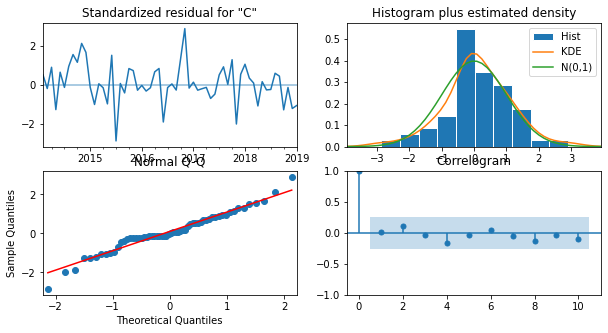

In [48]:
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [49]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [50]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [51]:
rmse = mean_squared_error(test['CONSUMER CONF INDEX'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['CONSUMER CONF INDEX'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2.327552815133348 
MAPE: 1.9289198922022786


In [52]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(0,1,2)",2.327553,1.92892


## Model 2

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

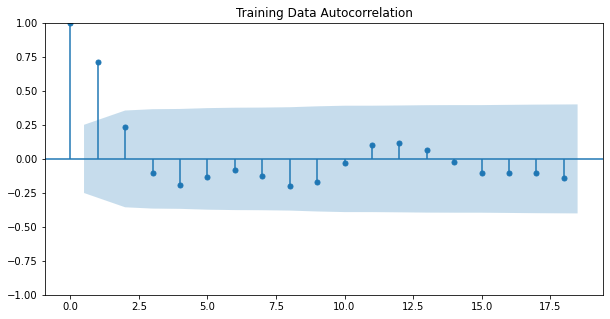

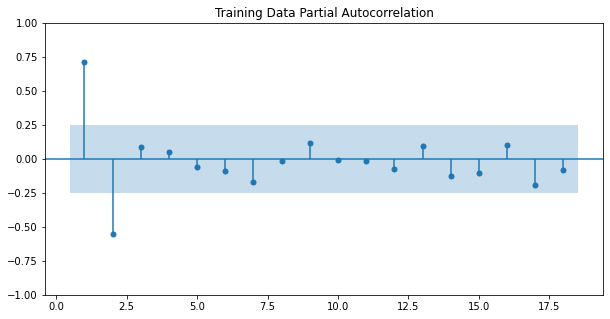

In [53]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive(Dependent on its own) parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 1.
* The Moving-Average(window=3,123,234,345---) parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 1.
* d= 1-->t2-t1(delta y)-->slope
* d= 2--> double differencing -->slope(slope) fucntion ARIMA (p=0,q=0,d=1)-->differencing 
* p & q-->?

By looking at the above plots, we will take the value of p and q as 1.

In [54]:
manual_ARIMA = ARIMA(train['CONSUMER CONF INDEX'], order=(1,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     CONSUMER CONF INDEX   No. Observations:                   61
Model:                  ARIMA(1, 1, 2)   Log Likelihood                  67.569
Date:                 Thu, 09 Feb 2023   AIC                           -127.138
Time:                         19:25:50   BIC                           -118.760
Sample:                     01-01-2014   HQIC                          -123.861
                          - 01-01-2019                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2579      0.210      1.230      0.219      -0.153       0.669
ma.L1          1.0455      0.180      5.813      0.000       0.693       1.398
ma.L2          0.5029      0.178      2.823 

C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Let us analyse the residuals from the various diagnostics plot.

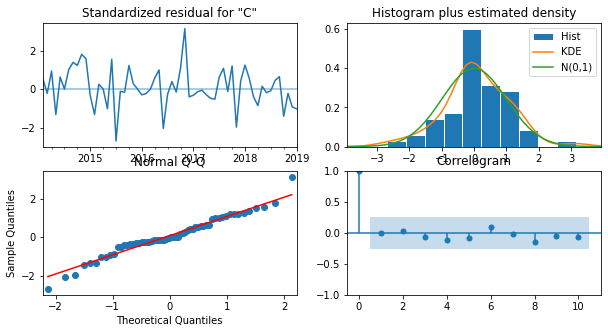

In [55]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [56]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [57]:
rmse = mean_squared_error(test['CONSUMER CONF INDEX'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['CONSUMER CONF INDEX'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2.2872033864232812 
MAPE: 1.9016919077628018


In [58]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(1,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(0,1,2)",2.327553,1.928920
"ARIMA(1,1,2)",2.287203,1.901692


In [59]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(1,1,2)'])
temp_resultsDf

,RMSE,MAPE
"ARIMA(1,1,2)",2.287203,1.901692


In [60]:
manual_ARMA = ARIMA(train['CONSUMER CONF INDEX'], order=(1,0,0))

results_manual_ARMA = manual_ARMA.fit()

print(results_manual_ARMA.summary())


                                SARIMAX Results                                
Dep. Variable:     CONSUMER CONF INDEX   No. Observations:                   61
Model:                  ARIMA(1, 0, 0)   Log Likelihood                  30.403
Date:                 Thu, 09 Feb 2023   AIC                            -54.806
Time:                         19:25:50   BIC                            -48.474
Sample:                     01-01-2014   HQIC                           -52.325
                          - 01-01-2019                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.3696      0.638    157.231      0.000      99.118     101.621
ar.L1          0.9847      0.030     33.007      0.000       0.926       1.043
sigma2         0.0204      0.003      6.391 

C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [61]:
predicted_manual_ARMA = results_manual_ARMA.forecast(steps=len(test))

In [62]:
rmse = mean_squared_error(test['CONSUMER CONF INDEX'],predicted_manual_ARMA,squared=False)
mape = mean_absolute_percentage_error(test['CONSUMER CONF INDEX'],predicted_manual_ARMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2.3078248932333665 
MAPE: 1.888781346147423


In [63]:
temp_resultsDf1 = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARMA(1,0,0)'])
temp_resultsDf1

,RMSE,MAPE
"ARMA(1,0,0)",2.307825,1.888781


## Model 3

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

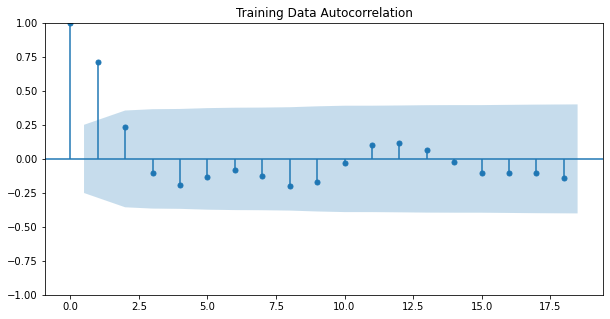

In [64]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

#there is seasonality present in the data. The RMSE might even fall in this model 

We can see that there is a seasonality.

In [65]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))
    
#(pdq)(PDQ)F
#(Trend differencing) * (Seasonal differencing) * (Frequency of seasonal term)

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [66]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [67]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['CONSUMER CONF INDEX'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:-59.04892130201036
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:-46.060595879524676
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:-63.223692541420746


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\li

SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:2044.1410076309066
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:-47.49628386370985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:-49.872290941222566
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:-61.97455150223911


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1833.4121195341072
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:-62.906035641476734
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:-62.98048109896908


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:-63.66732752163101


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1390.2871561105028
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:-50.808743035368835


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:-48.81309212271219


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:-50.70747690771514


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1666.7335499544417
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:-102.85538430491245
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:-88.47169884804158


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:-87.84855133694688
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:1824.1567035982025
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:-90.67104496259411


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:-90.71269435955865
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:-86.25760429824189


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:1272.880442512543
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:-90.67344141358724


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:-93.6915932652328
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:-68.29799046872081


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 1)x(2, 0, 3, 6) - AIC:1810.9792986735615
SARIMA(0, 1, 1)x(3, 0, 0, 6) - AIC:-83.00402998048132
SARIMA(0, 1, 1)x(3, 0, 1, 6) - AIC:-82.24122794127238


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 2, 6) - AIC:-81.90215741055826


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 1)x(3, 0, 3, 6) - AIC:1543.936757498704
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:-122.02247423632082
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:-106.90265828358905
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:-99.42552171858293


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 3, 6) - AIC:1665.0328523154953
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:-110.46555016535484


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:-111.52466718942888
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:-97.53841392845469


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 2)x(1, 0, 3, 6) - AIC:1643.6714901367227
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:-103.79281741086514
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:-105.13952753122473


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:-98.19513355724946


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 2)x(2, 0, 3, 6) - AIC:1540.0116146701248
SARIMA(0, 1, 2)x(3, 0, 0, 6) - AIC:-92.58512709042589
SARIMA(0, 1, 2)x(3, 0, 1, 6) - AIC:-91.15441776670048


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 2, 6) - AIC:-90.15761280404385
SARIMA(0, 1, 2)x(3, 0, 3, 6) - AIC:1358.7155606669908


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 0, 6) - AIC:-118.12892146828547
SARIMA(0, 1, 3)x(0, 0, 1, 6) - AIC:-105.87107610203098


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 2, 6) - AIC:-94.93733801995991


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 3)x(0, 0, 3, 6) - AIC:1718.997777736444
SARIMA(0, 1, 3)x(1, 0, 0, 6) - AIC:-109.25500839858624
SARIMA(0, 1, 3)x(1, 0, 1, 6) - AIC:-107.68643778648597


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 2, 6) - AIC:-93.06955196058615


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 3, 6) - AIC:1698.2356605390282
SARIMA(0, 1, 3)x(2, 0, 0, 6) - AIC:-102.89061864713554


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 1, 6) - AIC:-103.16878855155316


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 2, 6) - AIC:-90.8148681898632


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 3, 6) - AIC:1511.6162996812575
SARIMA(0, 1, 3)x(3, 0, 0, 6) - AIC:-93.99320105004884


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 1, 6) - AIC:-92.05370707111744


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 2, 6) - AIC:-88.25445651979113


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 3)x(3, 0, 3, 6) - AIC:1419.327403258655
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:-104.01208601988112
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:-88.5931300279076
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:-84.96106009886357


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(1, 1, 0)x(0, 0, 3, 6) - AIC:1859.3382755672349
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:-88.4455463265958
SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:-92.04884543393308


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:-83.09977037850173
SARIMA(1, 1, 0)x(1, 0, 3, 6) - AIC:1836.7791157433774
SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:-84.2596036100167


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:-85.53034532430047


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:-84.80155890197632


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 3, 6) - AIC:1662.3271613368895
SARIMA(1, 1, 0)x(3, 0, 0, 6) - AIC:-71.15129110185357


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 1, 6) - AIC:-69.27900357890798


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 2, 6) - AIC:-74.23934107851133


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(1, 1, 0)x(3, 0, 3, 6) - AIC:1712.7292328528351
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:-118.30302636536454
SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:-104.45572916348264
SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:-93.41951273483332


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(1, 1, 1)x(0, 0, 3, 6) - AIC:2022.9911740160164
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:-104.01874788220242
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:-106.45985050629623


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:-93.90653050389865


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:2001.0310176596681


C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:-96.2261206808759
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:-97.42443190734083
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:-95.68039063281066


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 3, 6) - AIC:1829.394967970886
SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:-87.41441670673296


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:-85.6186153481989


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:-84.59303286501006


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:1533.5166696147057
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:-120.96314032667959
SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:-106.53611064180495
SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:-97.90847342946672


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(1, 1, 2)x(0, 0, 3, 6) - AIC:1678.9819354013102
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:-107.27997828764687
SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:-109.56243077714217


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:-96.22784395385492


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 3, 6) - AIC:1657.6208895108364
SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:-101.45542825326868


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:-101.26007027486177


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:-96.29471685102807


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 3, 6) - AIC:1464.2607683769104


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 0, 6) - AIC:-87.99371580852625


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 1, 6) - AIC:-86.33936326451085


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 2, 6) - AIC:-85.91173092562572


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 6) - AIC:1419.473892661757
SARIMA(1, 1, 3)x(0, 0, 0, 6) - AIC:-116.79900263769467


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 1, 6) - AIC:-106.33343574955249


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 2, 6) - AIC:-96.27585946404703


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(1, 1, 3)x(0, 0, 3, 6) - AIC:1663.4869380635635
SARIMA(1, 1, 3)x(1, 0, 0, 6) - AIC:-109.97901618568847
SARIMA(1, 1, 3)x(1, 0, 1, 6) - AIC:-112.94368568302765


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 2, 6) - AIC:-94.40904180698828


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 3, 6) - AIC:1642.7254459783285
SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC:-99.28179684490443


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 1, 6) - AIC:-101.98749629874163


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 2, 6) - AIC:-93.00790517920568


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 3, 6) - AIC:1191.697061048575
SARIMA(1, 1, 3)x(3, 0, 0, 6) - AIC:-86.53562465619386


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 1, 6) - AIC:-85.04182833025203


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 2, 6) - AIC:-85.26782973255831


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(1, 1, 3)x(3, 0, 3, 6) - AIC:1359.1685961734343
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:-122.583533261437
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:-111.52734244733482
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:-103.78195653172955


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC:1918.8514640111066
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:-107.93357371074525
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:-109.8491299074123
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:-102.33667424339212


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 6) - AIC:1896.292303354485
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:-99.13002253116821


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:-101.51849072021207


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:-101.01648604819442


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(2, 1, 0)x(2, 0, 3, 6) - AIC:1722.0981884354892
SARIMA(2, 1, 0)x(3, 0, 0, 6) - AIC:-88.49873999257917
SARIMA(2, 1, 0)x(3, 0, 1, 6) - AIC:-86.51138937358208


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 2, 6) - AIC:-87.53690955687625
SARIMA(2, 1, 0)x(3, 0, 3, 6) - AIC:1709.9551033097318


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:-122.28248534737205
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:-108.94854957906905


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:-99.94538800560697
SARIMA(2, 1, 1)x(0, 0, 3, 6) - AIC:1827.9243796685296
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:-106.65494391977167


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:-108.69861543680108


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:-99.46747619670414


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 3, 6) - AIC:1805.9642241714112


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:-97.49744983377813


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:-99.95934688130741


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:-100.12515473993459
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:1635.7769969745445


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:-90.62037932906205


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:-88.74234540892613


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:-87.36941177063107


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:1531.2526007712058
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:-119.55960027072999
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:-105.01348570971656


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:-95.15639150771969


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1753.2043318182832
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:-111.10745125363461


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:-107.72186187455567


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:-98.14865291012322


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1731.8432018739243
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:-95.72965013721921
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:-99.60980143069413


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:-95.36146162434741


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:1558.7988477041647
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:-88.76755055204713


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:-86.85870433070203


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:-85.56465253522472


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:1472.8001283633935
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:-118.68576312686832
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:-109.22072736356057


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 0, 2, 6) - AIC:-95.20968513790814


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 0, 3, 6) - AIC:1711.58353536765
SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:-110.0235651837137


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 1, 6) - AIC:-111.57463334750433


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 2, 6) - AIC:-93.23166811918706


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 3, 6) - AIC:1690.8220278802698
SARIMA(2, 1, 3)x(2, 0, 0, 6) - AIC:-97.1665702810399


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 1, 6) - AIC:-98.8580312157592


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 2, 6) - AIC:-91.8263394638139


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 3, 6) - AIC:1537.5639567765968


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 0, 6) - AIC:-90.82605689091548


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 1, 6) - AIC:-89.53980050203404


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 2, 6) - AIC:-88.05930570961


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 3, 6) - AIC:1355.753996126136
SARIMA(3, 1, 0)x(0, 0, 0, 6) - AIC:-120.23043375213015


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(0, 0, 1, 6) - AIC:-109.9344960578279
SARIMA(3, 1, 0)x(0, 0, 2, 6) - AIC:-103.05072097653985


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(3, 1, 0)x(0, 0, 3, 6) - AIC:1914.9192675701047
SARIMA(3, 1, 0)x(1, 0, 0, 6) - AIC:-105.34832322508487
SARIMA(3, 1, 0)x(1, 0, 1, 6) - AIC:-109.91266521063753


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 0, 2, 6) - AIC:-101.41805989149928


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(3, 1, 0)x(1, 0, 3, 6) - AIC:1892.3601105070659
SARIMA(3, 1, 0)x(2, 0, 0, 6) - AIC:-94.589501623661
SARIMA(3, 1, 0)x(2, 0, 1, 6) - AIC:-98.31726038999645


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 2, 6) - AIC:-96.9552064179567


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 3, 6) - AIC:1718.9749042408089
SARIMA(3, 1, 0)x(3, 0, 0, 6) - AIC:-89.26120163959222


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 1, 6) - AIC:-87.63415704474026


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 2, 6) - AIC:-86.77765999842838


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(3, 1, 0)x(3, 0, 3, 6) - AIC:1529.6966112625619
SARIMA(3, 1, 1)x(0, 0, 0, 6) - AIC:-118.62751394641566
SARIMA(3, 1, 1)x(0, 0, 1, 6) - AIC:-106.99385396737544


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 0, 2, 6) - AIC:-98.01924824284016
SARIMA(3, 1, 1)x(0, 0, 3, 6) - AIC:1829.9243796685344


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 0, 6) - AIC:-103.56699297160947


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 1, 6) - AIC:-107.03738784601619


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 2, 6) - AIC:-98.29900518755142
SARIMA(3, 1, 1)x(1, 0, 3, 6) - AIC:1807.9642241714323


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 0, 6) - AIC:-102.4793863748027


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 1, 6) - AIC:-100.49513326270086


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 2, 6) - AIC:-99.68484951358775
SARIMA(3, 1, 1)x(2, 0, 3, 6) - AIC:1637.7789130881756


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 0, 6) - AIC:-91.51159988671425


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 1, 6) - AIC:-91.25294566739296


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 2, 6) - AIC:-89.94735695939471


C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 3, 6) - AIC:1425.016641462711
SARIMA(3, 1, 2)x(0, 0, 0, 6) - AIC:-118.20773885123853
SARIMA(3, 1, 2)x(0, 0, 1, 6) - AIC:-103.45170041357552


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 0, 2, 6) - AIC:-93.14732774057461


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 0, 3, 6) - AIC:1730.2053111014666
SARIMA(3, 1, 2)x(1, 0, 0, 6) - AIC:-101.9740095812569


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 1, 6) - AIC:-105.33656845016218


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 2, 6) - AIC:-94.9585828124009


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 3, 6) - AIC:1708.8445378982358
SARIMA(3, 1, 2)x(2, 0, 0, 6) - AIC:-101.84267820353666


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 1, 6) - AIC:-99.87493261995152


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 2, 6) - AIC:-103.7654166037829


C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 3, 6) - AIC:1546.8757224500364
SARIMA(3, 1, 2)x(3, 0, 0, 6) - AIC:-91.32972961071042


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 1, 6) - AIC:-88.53139923194412


C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 2, 6) - AIC:-87.00374884053095


C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 3, 6) - AIC:1418.1675777115943
SARIMA(3, 1, 3)x(0, 0, 0, 6) - AIC:-112.57572234597384
SARIMA(3, 1, 3)x(0, 0, 1, 6) - AIC:-99.95283088706711


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and 

SARIMA(3, 1, 3)x(0, 0, 2, 6) - AIC:-88.83023737411605
SARIMA(3, 1, 3)x(0, 0, 3, 6) - AIC:20.0


C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 0, 6) - AIC:-104.87510506440583


C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 1, 6) - AIC:-99.22112277668279


C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 2, 6) - AIC:-87.08963822170628


C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 3, 6) - AIC:22.0
SARIMA(3, 1, 3)x(2, 0, 0, 6) - AIC:-88.59382340518215


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 1, 6) - AIC:-92.60598891162653


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:-85.69913420266235


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:24.0
SARIMA(3, 1, 3)x(3, 0, 0, 6) - AIC:-86.68748680907733


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 1, 6) - AIC:-87.36548636467245
SARIMA(3, 1, 3)x(3, 0, 2, 6) - AIC:-85.76202502567284


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 3, 6) - AIC:26.0


C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\1023003196.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [68]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
128,"(2, 1, 0)","(0, 0, 0, 6)",-122.583533
144,"(2, 1, 1)","(0, 0, 0, 6)",-122.282485
32,"(0, 1, 2)","(0, 0, 0, 6)",-122.022474
96,"(1, 1, 2)","(0, 0, 0, 6)",-120.96314
192,"(3, 1, 0)","(0, 0, 0, 6)",-120.230434


In [69]:
#train["CONSUMER CONF INDEX"].plot(figsize=(10,4))
#auto_SARIMA.plt(legend = True)

In [70]:
#train["CONSUMER CONF INDEX"].plot(figsize=(10,4),legend = True)
#test["CONSUMER CONF INDEX"].plot(legend = True)

In [71]:
#results_manual_ARIMA_full_data.fittedvalues

In [72]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['CONSUMER CONF INDEX'],
                                order=(2, 1, 0),
                                seasonal_order=(0, 0, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     CONSUMER CONF INDEX   No. Observations:                   61
Model:                SARIMAX(2, 1, 0)   Log Likelihood                  64.292
Date:                 Thu, 09 Feb 2023   AIC                           -122.584
Time:                         19:27:20   BIC                           -116.402
Sample:                     01-01-2014   HQIC                          -120.176
                          - 01-01-2019                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1782      0.118     10.002      0.000       0.947       1.409
ar.L2         -0.5848      0.133     -4.389      0.000      -0.846      -0.324
sigma2         0.0064      0.001      5.578 

C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:
#### Kurtosis= most of the concentrartion between 68%
#### skewness 
#### Heteroskedasticity
#### Normality 
##log likelihood
# P is significant, hence can be used to forecast 
# age sex
#

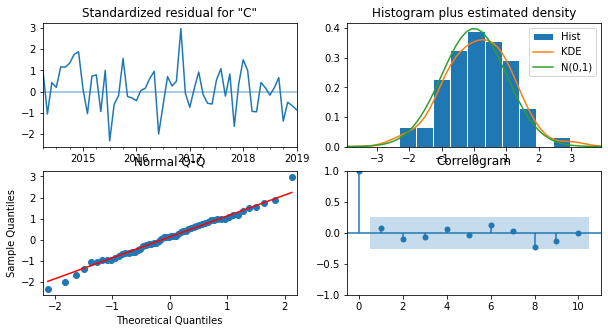

In [74]:
results_auto_SARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [75]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [76]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

CONSUMER CONF INDEX,mean,mean_se,mean_ci_lower,mean_ci_upper
2019-02-01,100.853027,0.079864,100.696496,101.009558
2019-03-01,100.805510,0.191413,100.430347,101.180674
2019-04-01,100.833606,0.305507,100.234824,101.432388
2019-05-01,100.894494,0.400301,100.109919,101.679069
2019-06-01,100.949799,0.469516,100.029566,101.870033


In [77]:
rmse = mean_squared_error(test['CONSUMER CONF INDEX'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['CONSUMER CONF INDEX'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2.4519827133870886 
MAPE: 2.0186895637117033


In [78]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(2,1,0)(0,0,0,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(0,1,2)",2.327553,1.928920
"ARIMA(1,1,2)",2.287203,1.901692
"SARIMA(2,1,0)(0,0,0,6)",2.451983,2.018690


In [79]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(2,1,0)(0,0,0,6)'])
temp_resultsDf

,RMSE,MAPE
"SARIMA(2,1,0)(0,0,0,6)",2.451983,2.01869


## Model 4

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

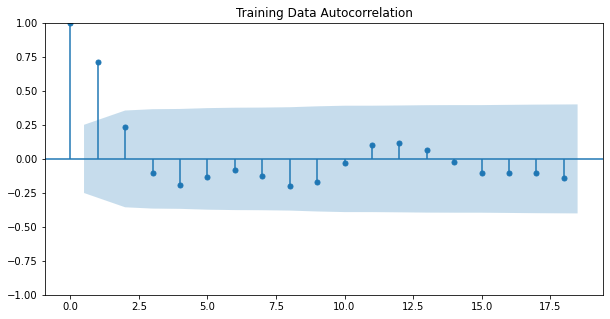

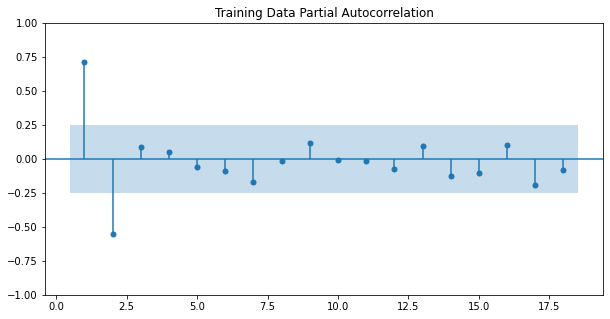

In [80]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 3 or its multiple e.g. 6.
We are taking the p value to be 3 and the q value also to be 3 as the parameters same as the ARIMA model. (It performed best)

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 1. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 1.

Remember to check the ACF and the PACF plots only at multiples of 3 (since 3 is the seasonal period).

In [81]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['CONSUMER CONF INDEX'],
                                order=(3,1,3),
                                seasonal_order=(1, 0, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                 CONSUMER CONF INDEX   No. Observations:                   61
Model:             SARIMAX(3, 1, 3)x(1, 0, [1], 6)   Log Likelihood                  58.611
Date:                             Thu, 09 Feb 2023   AIC                            -99.221
Time:                                     19:27:21   BIC                            -82.013
Sample:                                 01-01-2014   HQIC                           -92.668
                                      - 01-01-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2029      1.347      0.893      0.372      -1.437       3.843
ar.L2         -0.6264      

C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


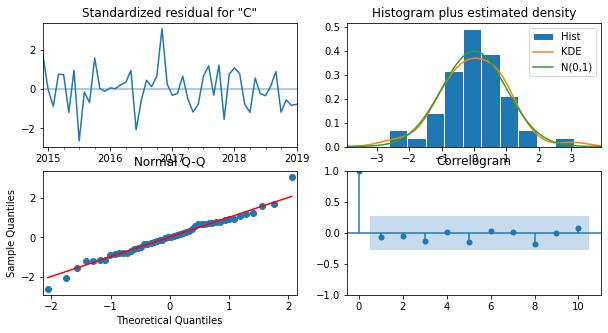

In [82]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [83]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [84]:
rmse = mean_squared_error(test['CONSUMER CONF INDEX'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['CONSUMER CONF INDEX'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2.350801114299934 
MAPE: 1.9429163704482337


## Model 5

 ## Build automated version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

In [85]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(1,0,1,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(0,1,2)",2.327553,1.928920
"ARIMA(1,1,2)",2.287203,1.901692
"SARIMA(2,1,0)(0,0,0,6)",2.451983,2.018690
"SARIMA(3,1,3)(1,0,1,6)",2.350801,1.942916


In [86]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [87]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [88]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['CONSUMER CONF INDEX'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:-59.04892130201036
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:-64.55957363030375


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\266442

SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:-45.97817987865199
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:-64.78617486141376
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:-65.12562262618238


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:-45.70908116785033
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:-44.21119664764396
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:-44.62837250654081


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\li

SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:-46.936975547462204
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:-102.85538430491245
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:-89.6531651271068


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\li

SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:-67.36055263876497
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:-92.64163842531067


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:-94.34681497612249


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:-65.39295139437617
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:-69.62711415800963


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:-70.34332935569834


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:-65.6850728352033
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:-122.02247423632082


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:-101.25747364464138


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:-73.04801792320119
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:-105.0972688031231


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:-101.64968288778587


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:-71.88086618359203


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:-78.59726433486416


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:-78.75861877662003


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:-69.61593567443295
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:-104.01208601988112
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:-84.01448659907005


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\li

SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:-61.42553384472696
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:-84.38033823165891


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:-87.9756268176835


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:-60.4135500804599
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:-57.26063317993194


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:-59.835603410059946


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:-58.34597137298415
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:-118.30302636536454


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:-93.7800749817278


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:-71.34962914311954
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:-94.88405331900185


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:-99.52897211862435


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:-70.96268350959325
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:-72.86102903986564


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:-72.20050137808306


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:-70.02163574235576
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:-120.96314032667959


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:-99.89022889157339


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:-71.05223808167649
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:-103.4337266038982


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:-99.89479732268735


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:-70.01096508592256


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:-73.70424274848884


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:-73.31600076579191


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:-67.60318070317948
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:-122.583533261437
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:-104.95826537544922


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\li

SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:-76.6761600076042
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:-100.91093590142935


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:-103.46188101414936


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:-74.67625563311366


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:-73.27455527984331
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:-72.30715986186097


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:-71.76027771469232
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:-122.28248534737205


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:-101.76617266474695


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:-73.52932748929605
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:-99.29772864501821


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:-103.16839762904411


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:-74.32102379896422


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:-75.08747918202386


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:-73.08780161350805


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:-70.60787980974418


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:-119.55960027072999
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:-96.96630272677609


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:-69.09933664805254


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:-97.63278239293282
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:-98.08686548202881


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:-71.42194528596684


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:-73.33588432800126


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:-71.38829288104013


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:-69.3772684896971


C:\Users\Shilpi\AppData\Local\Temp\ipykernel_13524\2664421353.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [89]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
54,"(2, 1, 0)","(0, 0, 0, 12)",-122.583533
63,"(2, 1, 1)","(0, 0, 0, 12)",-122.282485
18,"(0, 1, 2)","(0, 0, 0, 12)",-122.022474
45,"(1, 1, 2)","(0, 0, 0, 12)",-120.96314
72,"(2, 1, 2)","(0, 0, 0, 12)",-119.5596


In [90]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['CONSUMER CONF INDEX'].values,
                                order=(2, 1, 0),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   61
Model:               SARIMAX(2, 1, 0)   Log Likelihood                  64.292
Date:                Thu, 09 Feb 2023   AIC                           -122.584
Time:                        19:27:44   BIC                           -116.402
Sample:                             0   HQIC                          -120.176
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1782      0.118     10.002      0.000       0.947       1.409
ar.L2         -0.5848      0.133     -4.389      0.000      -0.846      -0.324
sigma2         0.0064      0.001      5.578      0.0

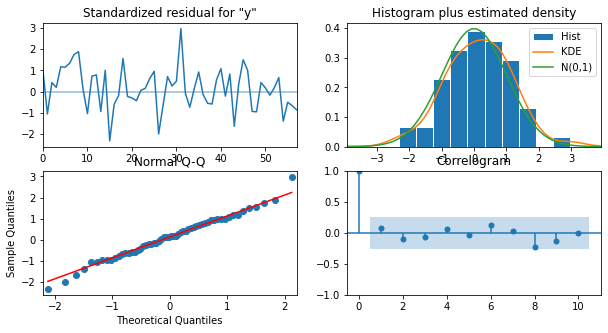

In [91]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [92]:
import statsmodels.api as sm

auto_SARIMA_12_order = sm.tsa.statespace.SARIMAX(train['CONSUMER CONF INDEX'].values,
                                order=(0, 1, 2),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12_order = auto_SARIMA_12_order.fit(maxiter=1000)
print(results_auto_SARIMA_12_order.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   61
Model:               SARIMAX(0, 1, 2)   Log Likelihood                  64.011
Date:                Thu, 09 Feb 2023   AIC                           -122.022
Time:                        19:27:44   BIC                           -115.893
Sample:                             0   HQIC                          -119.640
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.2944      0.087     14.847      0.000       1.124       1.465
ma.L2          0.6897      0.114      6.035      0.000       0.466       0.914
sigma2         0.0061      0.001      6.433      0.0

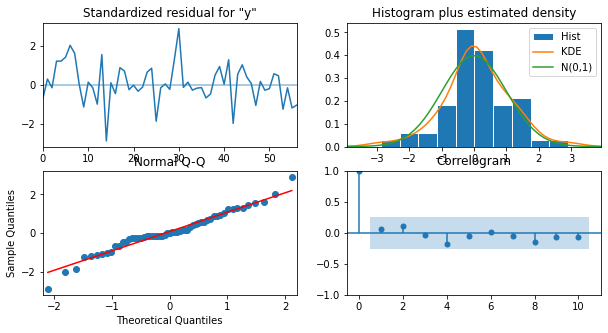

In [93]:
results_auto_SARIMA_12_order.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [94]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [95]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,100.853027,0.079864,100.696496,101.009558
1,100.805510,0.191413,100.430347,101.180674
2,100.833606,0.305507,100.234824,101.432388
3,100.894494,0.400301,100.109919,101.679069
4,100.949799,0.469516,100.029566,101.870033


In [96]:
rmse = mean_squared_error(test['CONSUMER CONF INDEX'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

2.4519827133870886


In [97]:
rmse = mean_squared_error(test['CONSUMER CONF INDEX'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['CONSUMER CONF INDEX'],predicted_auto_SARIMA_12.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2.4519827133870886 
MAPE: 2.0186895637117033


In [98]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE': [mape]}
                           ,index=['SARIMA(2,1,0)(0,0,0,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(0,1,2)",2.327553,1.928920
"ARIMA(1,1,2)",2.287203,1.901692
"SARIMA(2,1,0)(0,0,0,6)",2.451983,2.018690
"SARIMA(3,1,3)(1,0,1,6)",2.350801,1.942916
"SARIMA(2,1,0)(0,0,0,12)",2.451983,2.018690


In [99]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE': [mape]}
                           ,index=['SARIMA(2,1,0)(0,0,0,12)'])

In [100]:
#new iteration of the model with change in order

In [101]:
predicted_auto_SARIMA_12_order = results_auto_SARIMA_12_order.get_forecast(steps=len(test))

In [102]:
rmse = mean_squared_error(test['CONSUMER CONF INDEX'],predicted_auto_SARIMA_12_order.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['CONSUMER CONF INDEX'],predicted_auto_SARIMA_12_order.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2.3300073418427436 
MAPE: 1.9304694709484438


In [103]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE': [mape]}
                           ,index=['SARIMA(0,1,2)(0,0,0,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(0,1,2)",2.327553,1.928920
"ARIMA(1,1,2)",2.287203,1.901692
"SARIMA(2,1,0)(0,0,0,6)",2.451983,2.018690
"SARIMA(3,1,3)(1,0,1,6)",2.350801,1.942916
"SARIMA(2,1,0)(0,0,0,12)",2.451983,2.018690
"SARIMA(0,1,2)(0,0,0,12)",2.330007,1.930469


In [104]:
# resultsDf.drop(index='SARIMA(2,1,0)(0,0,0,12)',axis=0,inplace=True)

There is no difference in taking seasonality at 6 or 12. RMSE and MAPE values are same for both SARIMA at seasonality 6 and 12. 

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [105]:
manual_ARIMA = ARIMA(df['CONSUMER CONF INDEX'], order=(1,1,1))

results_manual_ARIMA_full_data = manual_ARIMA.fit()

print(results_manual_ARIMA_full_data.summary())

                                SARIMAX Results                                
Dep. Variable:     CONSUMER CONF INDEX   No. Observations:                  105
Model:                  ARIMA(1, 1, 1)   Log Likelihood                  70.619
Date:                 Thu, 09 Feb 2023   AIC                           -135.238
Time:                         19:27:45   BIC                           -127.305
Sample:                     01-01-2014   HQIC                          -132.024
                          - 09-01-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6267      0.064      9.717      0.000       0.500       0.753
ma.L1          0.7543      0.070     10.766      0.000       0.617       0.892
sigma2         0.0148      0.002      8.975 

C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


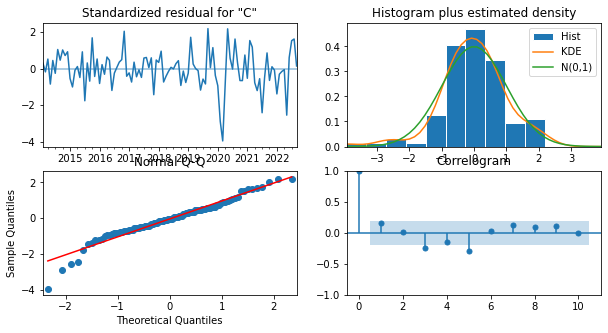

In [106]:
results_manual_ARIMA_full_data.plot_diagnostics();

## Evaluate the model on the whole data and predict 24 months into the future (till the end of next year).

In [107]:
predicted_manual_SARIMA_full_data = results_auto_SARIMA.get_forecast(steps=24)

In [109]:
predicted_manual_SARIMA_full_data = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.07)
predicted_manual_SARIMA_full_data.head()

CONSUMER CONF INDEX,mean,mean_se,mean_ci_lower,mean_ci_upper
2019-02-01,100.853027,0.079864,100.708320,100.997733
2019-03-01,100.805510,0.191413,100.458686,101.152334
2019-04-01,100.833606,0.305507,100.280055,101.387156
2019-05-01,100.894494,0.400301,100.169185,101.619803
2019-06-01,100.949799,0.469516,100.099079,101.800520


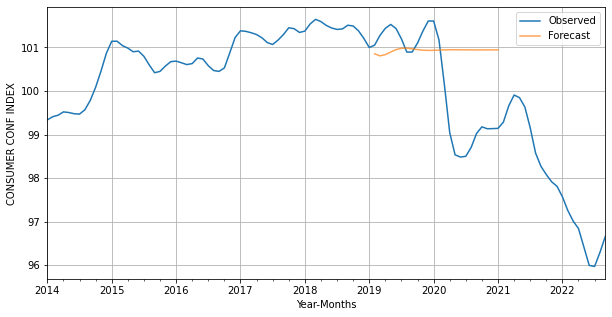

In [110]:
axis = df['CONSUMER CONF INDEX'].plot(label='Observed')
predicted_manual_SARIMA_full_data['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('CONSUMER CONF INDEX')
plt.legend(loc='best')
plt.grid();

In [111]:
predicted_manual_ARIMA_full_data = results_manual_ARIMA_full_data.get_forecast(steps=24)
#sarima = results_auto_SARIMA_12

In [112]:
pred_full_manual_ARIMA_date = predicted_manual_ARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_ARIMA_date.head()

CONSUMER CONF INDEX,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-10-01,96.905681,0.121459,96.667626,97.143737
2022-11-01,97.058599,0.313667,96.443822,97.673375
2022-12-01,97.154437,0.503863,96.166883,98.141990
2023-01-01,97.214502,0.682401,95.877021,98.551983
2023-02-01,97.252146,0.846862,95.592327,98.911966


In [113]:
rmse = mean_squared_error(df['CONSUMER CONF INDEX'],results_manual_ARIMA_full_data.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 9.694871891306006


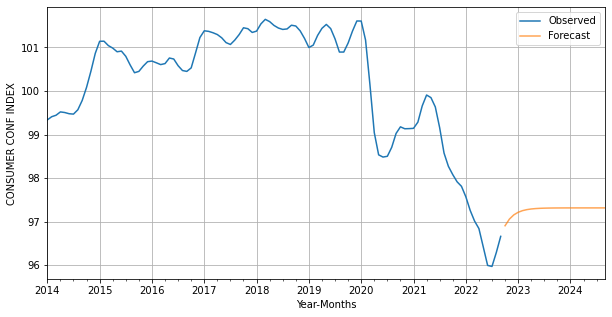

In [114]:
axis = df['CONSUMER CONF INDEX'].plot(label='Observed')
pred_full_manual_ARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('CONSUMER CONF INDEX')
plt.legend(loc='best')
plt.grid();

In [115]:
resultsDf #ARIMA(1,1,1) best model lower RMSE 

,RMSE,MAPE
"ARIMA(0,1,2)",2.327553,1.928920
"ARIMA(1,1,2)",2.287203,1.901692
"SARIMA(2,1,0)(0,0,0,6)",2.451983,2.018690
"SARIMA(3,1,3)(1,0,1,6)",2.350801,1.942916
"SARIMA(2,1,0)(0,0,0,12)",2.451983,2.018690
"SARIMA(0,1,2)(0,0,0,12)",2.330007,1.930469
